In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
import datetime
import lightgbm as lgb
import os
import time

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/ens

In [2]:
data = pd.read_csv("dataset/preprocessed.csv")


In [3]:
data_npWNan = data.iloc[:, :].values

data_np = data_npWNan[data_npWNan[:,-1]!= -1 ]


In [4]:
print("feature " + str(data_np.shape))

feature (762094, 44)


In [5]:
feature = data_np[:, :-1]
target = data_np[:, -1]

In [6]:
target -= 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 0)

In [8]:
X_train.shape

(609675, 43)

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1      2      3      4]
 [ 62846  69846 109216 147032 220735]]


Text(0.5, 1.0, 'Unbalanced Data Distribution')

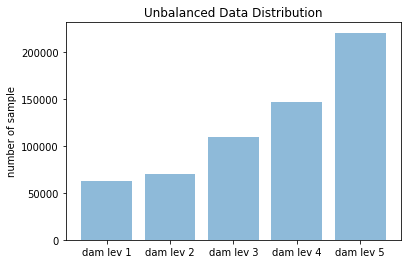

In [10]:
objects = ('dam lev 1', 'dam lev 2', 'dam lev 3', 'dam lev 4', 'dam lev 5')
y_pos = np.arange(len(objects))
plt.bar(y_pos, counts_elements, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('number of sample')
plt.title('Unbalanced Data Distribution')

In [11]:
sm = SMOTETomek(random_state = 27, n_jobs = -1)

X_train, y_train = sm.fit_sample(X_train, y_train)

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


In [12]:
X_train.shape


(955513, 43)

In [13]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1      2      3      4]
 [204152 195863 187569 181912 186017]]


Text(0.5, 1.0, 'After Re-sampling Data Distribution')

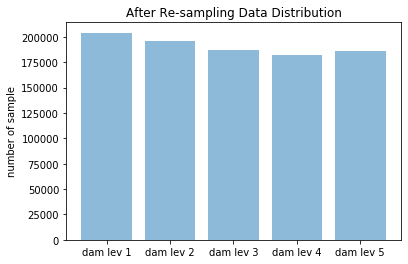

In [14]:
objects = ('dam lev 1', 'dam lev 2', 'dam lev 3', 'dam lev 4', 'dam lev 5')
y_pos = np.arange(len(objects))
plt.bar(y_pos, counts_elements, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('number of sample')
plt.title('After Re-sampling Data Distribution')

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
from sklearn.model_selection import GridSearchCV
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs = 1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [17]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)

In [18]:
import datetime
a = datetime.datetime.now().replace(microsecond=0)

model = lgb.LGBMClassifier(n_jobs = -1)
param_grid = {
    # 'n_estimators': [800, 1500, 3500],
    # 'colsample_bytree': [0.7, 0.8],
    # 'max_depth': [10,20,30],
    # 'num_leaves': [50, 100, 200],
    # 'reg_alpha': [1.1, 1.2, 1.3],
    # 'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4, 0.5],
    # 'subsample': [0.7, 0.8, 0.9],
    # 'subsample_freq': [10, 20, 30],
    'learning_rate' : [0.5],
    'boosting_type' : ['gbdt'],
    # 'subsample_for_bin' : [100, 1000, 10000],
    'objective' : ['multiclass'],
    
    
    'n_estimators': [500],
    'colsample_bytree': [1.0],
    'max_depth': [40],
    'num_leaves': [50],
    'reg_alpha': [1.1],
    'reg_lambda': [1.1],
    'subsample': [0.5],
    'subsample_freq': [1],
    'subsample_for_bin' : [100],
    
    
    
    
    
}
os.system('spd-say "your program will start"')
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv = 2, scoring_fit='accuracy')

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] boosting_type=gbdt, colsample_bytree=1.0, learning_rate=0.5, max_depth=40, min_split_gain=0.5, n_estimators=500, num_leaves=50, objective=multiclass, reg_alpha=1.1, reg_lambda=1.1, subsample=0.5, subsample_for_bin=100, subsample_freq=1 
[CV]  boosting_type=gbdt, colsample_bytree=1.0, learning_rate=0.5, max_depth=40, min_split_gain=0.5, n_estimators=500, num_leaves=50, objective=multiclass, reg_alpha=1.1, reg_lambda=1.1, subsample=0.5, subsample_for_bin=100, subsample_freq=1, total= 1.3min
[CV] boosting_type=gbdt, colsample_bytree=1.0, learning_rate=0.5, max_depth=40, min_split_gain=0.5, n_estimators=500, num_leaves=50, objective=multiclass, reg_alpha=1.1, reg_lambda=1.1, subsample=0.5, subsample_for_bin=100, subsample_freq=1 
[CV]  boosting_type=gbdt, colsample_bytree=1.0, learning_rate=0.5, max_depth=40, min_split_gain=0.5, n_estimators=500, num_leaves=50, objective=multiclass, reg_alpha=1.1, reg_lambda=1.1, subsample=0.5

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/emreunel/anaconda3/envs

In [19]:
print(model.best_score_)

0.512566548021848


In [20]:
print(model.best_params_)

{'boosting_type': 'gbdt', 'colsample_bytree': 1.0, 'learning_rate': 0.5, 'max_depth': 40, 'min_split_gain': 0.5, 'n_estimators': 500, 'num_leaves': 50, 'objective': 'multiclass', 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.5, 'subsample_for_bin': 100, 'subsample_freq': 1}


In [21]:
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:23:47


In [22]:
params = model.best_params_

In [23]:
model = lgb.LGBMClassifier(n_jobs = -1,
                           boosting_type = params['boosting_type'],
                           colsample_bytree = params['colsample_bytree'],
                           learning_rate = params['learning_rate'],
                           max_depth = params['max_depth'],
                           min_split_gain = params['min_split_gain'],
                           # n_estimators = params['n_estimators'],
                           n_estimators = 3500,
                           num_leaves = params['num_leaves'],
                           objective = params['objective'],
                           reg_alpha = params['reg_alpha'],
                           reg_lambda = params['reg_lambda'],
                           subsample = params['subsample'],
                           subsample_for_bin = params['subsample_for_bin'],
                           subsample_freq = params['subsample_freq'],
                           )

In [24]:

a = datetime.datetime.now().replace(microsecond=0)
model.fit(X_train, y_train)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:12:27


In [25]:
#Prediction
a = datetime.datetime.now().replace(microsecond=0)
y_pred=model.predict(X_test)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)



0:01:13


/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print("Accuracy: \t", accuracy_score(y_test, y_pred))
print("F1 Score: \t", f1_score(y_test, y_pred, average = 'macro'))
print("Precision:\t", precision_score(y_test, y_pred, average = 'macro'))
print("Recall:   \t", recall_score(y_test, y_pred, average = 'macro'))

Accuracy: 	 0.5255775198630092
F1 Score: 	 0.4838164057916613
Precision:	 0.47986435588159326
Recall:   	 0.49159864374897494


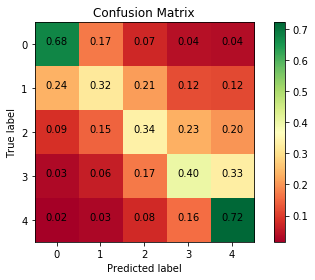

array([[0.67568414, 0.17239652, 0.07364268, 0.04158056, 0.0366961 ],
       [0.23531101, 0.31962552, 0.20929298, 0.12038367, 0.11538682],
       [0.08508604, 0.14594058, 0.33714517, 0.23087954, 0.20094867],
       [0.03107682, 0.06166467, 0.17108552, 0.40372705, 0.33244594],
       [0.01546401, 0.0286384 , 0.07788337, 0.15620287, 0.72181134]])

In [27]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest',cmap="RdYlGn")
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(5):
    for j in range(5):
        plt.text(j,i,format(cm[i][j],".2f"),horizontalalignment="center",color="black")
plt.tight_layout()
plt.show()
cm



In [28]:

counter = 0
while(counter < 2):
    os.system('spd-say "your program has finished"')
    time.sleep(3)
    counter += 1

